Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
from matplotlib import pyplot as plt

%matplotlib inline

RANDOM_STATE = 10
np.random.seed(RANDOM_STATE)

Loading the dataset

In [2]:
xlsx_file = '/content/Bank_loan_data.xlsx'
df = pd.read_excel(xlsx_file, sheet_name = 'Data')

In [3]:
df.head(50)

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,NaN,1,49.0,91107,4,1.6,1,0,NaN,0,1,0,0.0,0
1,2,45,NaN,19,34.0,90089,3,1.5,1,0,NaN,0,1,0,0.0,0
2,3,39,NaN,15,11.0,94720,1,1.0,1,0,NaN,0,0,0,0.0,0
3,4,35,NaN,9,100.0,94112,1,2.7,2,0,NaN,0,0,0,0.0,0
4,5,35,NaN,8,45.0,91330,4,1.0,2,0,NaN,0,0,0,0.0,1
5,6,37,NaN,13,29.0,92121,4,0.4,2,155,NaN,0,0,0,1.0,0
6,7,53,NaN,27,72.0,91711,2,1.5,2,0,NaN,0,0,0,1.0,0
7,8,50,NaN,24,22.0,93943,1,0.3,3,0,NaN,0,0,0,0.0,1
8,9,35,NaN,10,81.0,90089,3,0.6,2,104,NaN,0,0,0,1.0,0
9,10,34,M,9,180.0,93023,1,8.9,3,0,Home Owner,1,0,0,0.0,0


Performing the EDA in the above dataframe

In [4]:
print(list(df.columns))

['ID', 'Age', 'Gender', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Home Ownership', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


In [5]:
df['Personal Loan'].value_counts()

0    4520
1     479
        1
Name: Personal Loan, dtype: int64

I found there is one 'space string' in the target column. Lets us remove it so that this will be just binary classification.

In [6]:
df = df.drop(df[df['Personal Loan'] == ' '].index)

In [7]:
df['Personal Loan'].value_counts()

0    4520
1     479
Name: Personal Loan, dtype: int64

Changing the object datatype of target class to the intger.

In [8]:
df['Personal Loan'] = df['Personal Loan'].astype('int64')

Showing the distribution of the element of the target class.

<BarContainer object of 2 artists>

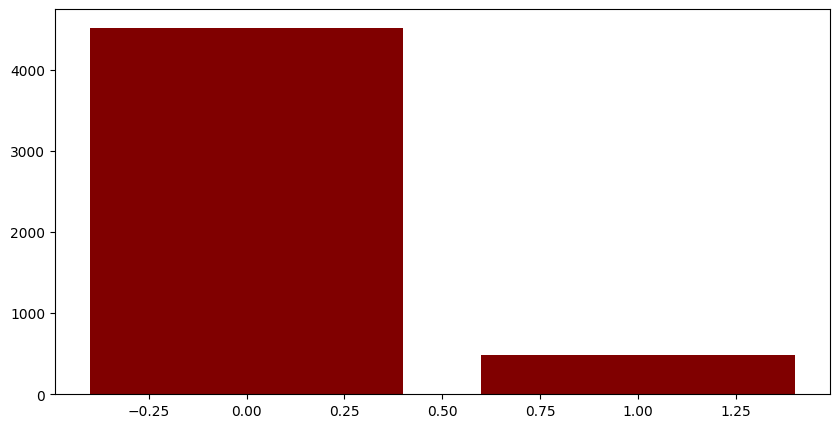

In [9]:
label = df['Personal Loan'].value_counts().index
values = df['Personal Loan'].value_counts().values
list(label)
list(values)
plt.figure(figsize = (10 , 5))
plt.bar(label , values , color = "maroon")

**Gist**: The elements of target class is highly imbalanced. <br>
**Insight**: We can't train our ML model directly without addressing this issue as the number of elements with the element '0' in the target class is more than 9 times than element '1'. So, if our model only predicts '0', it is certain that model's accuracy will be more than 90%. <br>
Conclusion: We must use use other techniques like resampling or synthetic data generation. And use evaluation metircs other than just the accuracy.

Getting the general info about the dataset:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  4999 non-null   int64  
 1   Age                 4999 non-null   int64  
 2   Gender              479 non-null    object 
 3   Experience          4999 non-null   int64  
 4   Income              4932 non-null   float64
 5   ZIP Code            4999 non-null   int64  
 6   Family              4999 non-null   int64  
 7   CCAvg               4999 non-null   float64
 8   Education           4999 non-null   int64  
 9   Mortgage            4999 non-null   int64  
 10  Home Ownership      479 non-null    object 
 11  Personal Loan       4999 non-null   int64  
 12  Securities Account  4999 non-null   int64  
 13  CD Account          4999 non-null   int64  
 14  Online              4959 non-null   float64
 15  CreditCard          4999 non-null   int64  
dtypes: flo

Finding the number of categorical and numerical features from the dataset.

In [11]:
print(f'Categorical Features: {len([x for x in df.columns if df[x].dtype == object])}')
print(f'Numerical Features: {len([x for x in df.columns if df[x].dtype == float or df[x].dtype == int])}')

Categorical Features: 2
Numerical Features: 14


Note: Although the Family and Education has the datatype of integer, they serve the ordinal feature.

In [12]:
## For string/Object type (Categorical) columns only
df.describe(include=['O'])

,Gender,Home Ownership
count,479,479
unique,3,3
top,M,Home Mortage
freq,305,218


In [13]:
print(df["Gender"].unique())

[nan 'M' 'F' 'O']


In [14]:
print(df["Home Ownership"].unique())

[nan 'Home Owner' 'Rent' 'Home Mortage']


In [15]:
df['Gender'].value_counts()

M    305
F    141
O     33
Name: Gender, dtype: int64

In [16]:
df['Home Ownership'].value_counts()

Home Mortage    218
Home Owner      138
Rent            123
Name: Home Ownership, dtype: int64

**Note:** We have 5,000 rows of data but we have only 479 data of Gender and Home Ownership features. We can drop these two features.

Found interesting pattern in the data, we have 'Personal Loan' as 1 only when we have the 'Gender' and 'Home Ownership'not NaN. And there are only 479 data of 'Gender' and 'Home Ownership' availablbe.

It is very difficult to fill up the remaining 4520 NaN values precisely. If we do fill these values with some means, it may give rise to the unitended realtionship with the target class. So, I would like to drop these 2 features 'Gender' and 'Home Ownership'.

In [17]:
df.drop(['Gender', 'Home Ownership'],axis=1,inplace=True)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49.0,91107,4,1.6,1,0,0,1,0,0.0,0
1,2,45,19,34.0,90089,3,1.5,1,0,0,1,0,0.0,0
2,3,39,15,11.0,94720,1,1.0,1,0,0,0,0,0.0,0
3,4,35,9,100.0,94112,1,2.7,2,0,0,0,0,0.0,0
4,5,35,8,45.0,91330,4,1.0,2,0,0,0,0,0.0,1


In [18]:
columns_with_nan = df.columns[df.isna().any()].tolist()

print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: ['Income', 'Online']


In [19]:
df['Online'].value_counts()

1.0    2960
0.0    1999
Name: Online, dtype: int64

Finding out how many Null values are in the column 'Income'

In [20]:
nan_count = df['Income'].isna().sum()

print("Number of NaN values in 'Income' column:", nan_count)

Number of NaN values in 'Income' column: 67


<Axes: >

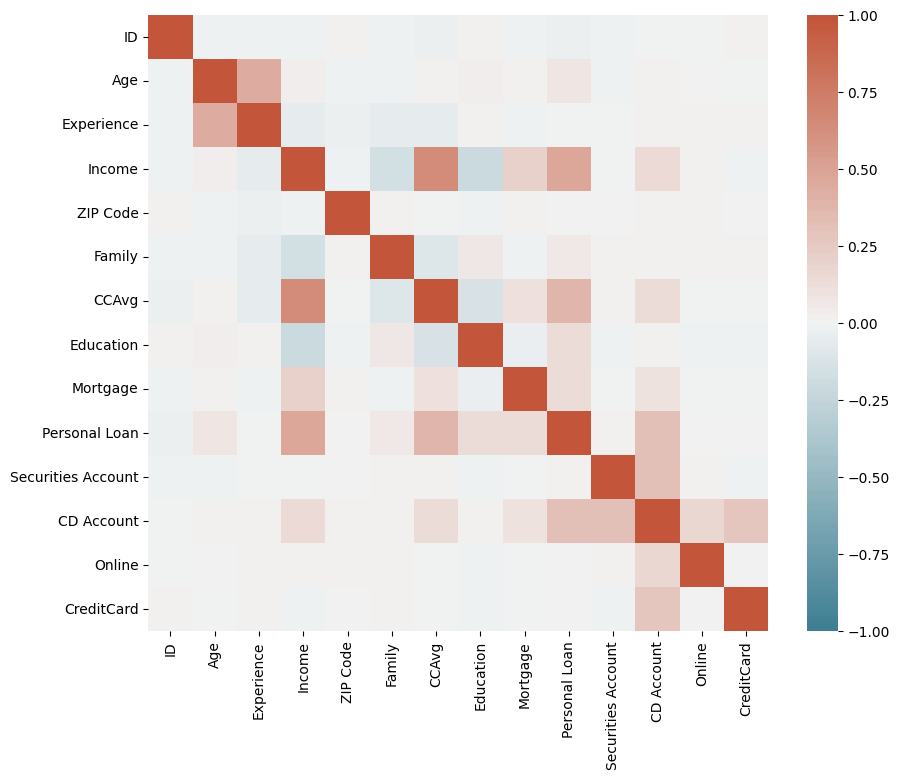

In [21]:
plt.rcParams['figure.figsize'] = 10, 8
sns.heatmap(df.select_dtypes(include=np.number).corr(),
             vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200))

Dropping the rows of 'Income' and 'Online' features. As they have only 67 and 40 Nan values. I took the step of dropping the rows with NaN values.
**Reason:** Income was more positively correlated with CCavg, sightly positively correlated with 'Mortage' and slightly negatively correlated with 'Family' and 'Education'. so it would be difficult to calculate precise income form these features using the correlation coefficient. And we have only 67 NaN values. so dropping those rows with NaN values wolud be easy option.

In [22]:
df.dropna(inplace=True)

Checking if any of the columns have the negative value or not. Because none of the columns should have negative value as negative value does not make sense in any of the columns.

In [23]:
columns_with_negatives = df.columns[df.lt(0).any()]

print(columns_with_negatives.tolist())

['Experience']


As 'Experince' features contains some negative values which is just odd. Negative values makes no sense in Experience, at the least somone would have zero (0) experience not negative.

In [24]:
df[df['Experience']<0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113.0,94303,4,2.300000,3,0,0,0,0,0.0,1
226,227,24,-1,39.0,94085,2,1.700000,2,0,0,0,0,0.0,0
315,316,24,-2,51.0,90630,3,0.300000,3,0,0,0,0,1.0,0
451,452,28,-2,48.0,94132,2,1.750000,3,89,0,0,0,1.0,0
524,525,24,-1,75.0,93014,4,0.200000,1,0,0,0,0,1.0,0
536,537,25,-1,43.0,92173,3,2.400000,2,176,0,0,0,1.0,0
540,541,25,-1,109.0,94010,4,2.300000,3,314,0,0,0,1.0,0
576,577,25,-1,48.0,92870,3,0.300000,3,0,0,0,0,0.0,1
583,584,24,-1,38.0,95045,2,1.700000,2,0,0,0,0,1.0,0
597,598,24,-2,125.0,92835,2,7.200000,1,0,0,1,0,0.0,1


**NOTE:** At max. people have -3 (for negative) as the experience with all those people less than 30 years of year. So, there must be data entry mistake and it should be postive values in the 'Experience'.

Changing the negative values in the 'Experience' using abs() function.

In [25]:
df['Experience'] = abs(df['Experience'])

In [26]:
#Checking on of the negative values which was negative previously.
df['Experience'][2618]

3

<Axes: >

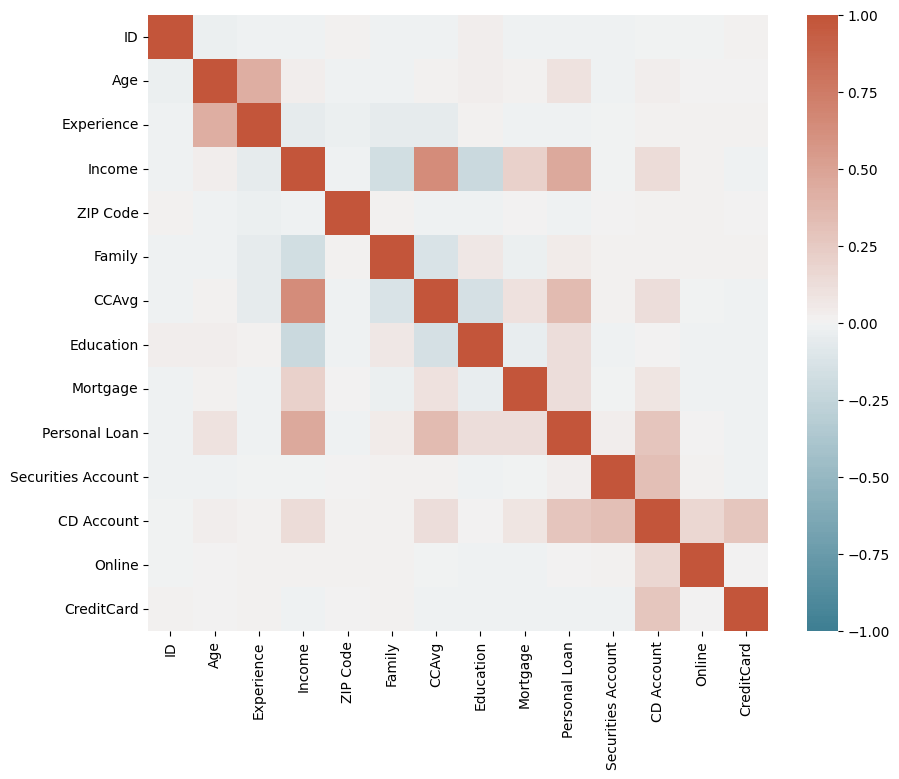

In [27]:
plt.rcParams['figure.figsize'] = 10, 8
sns.heatmap(df.select_dtypes(include=np.number).corr(),
             vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200))

Count of each of the value of columns/features

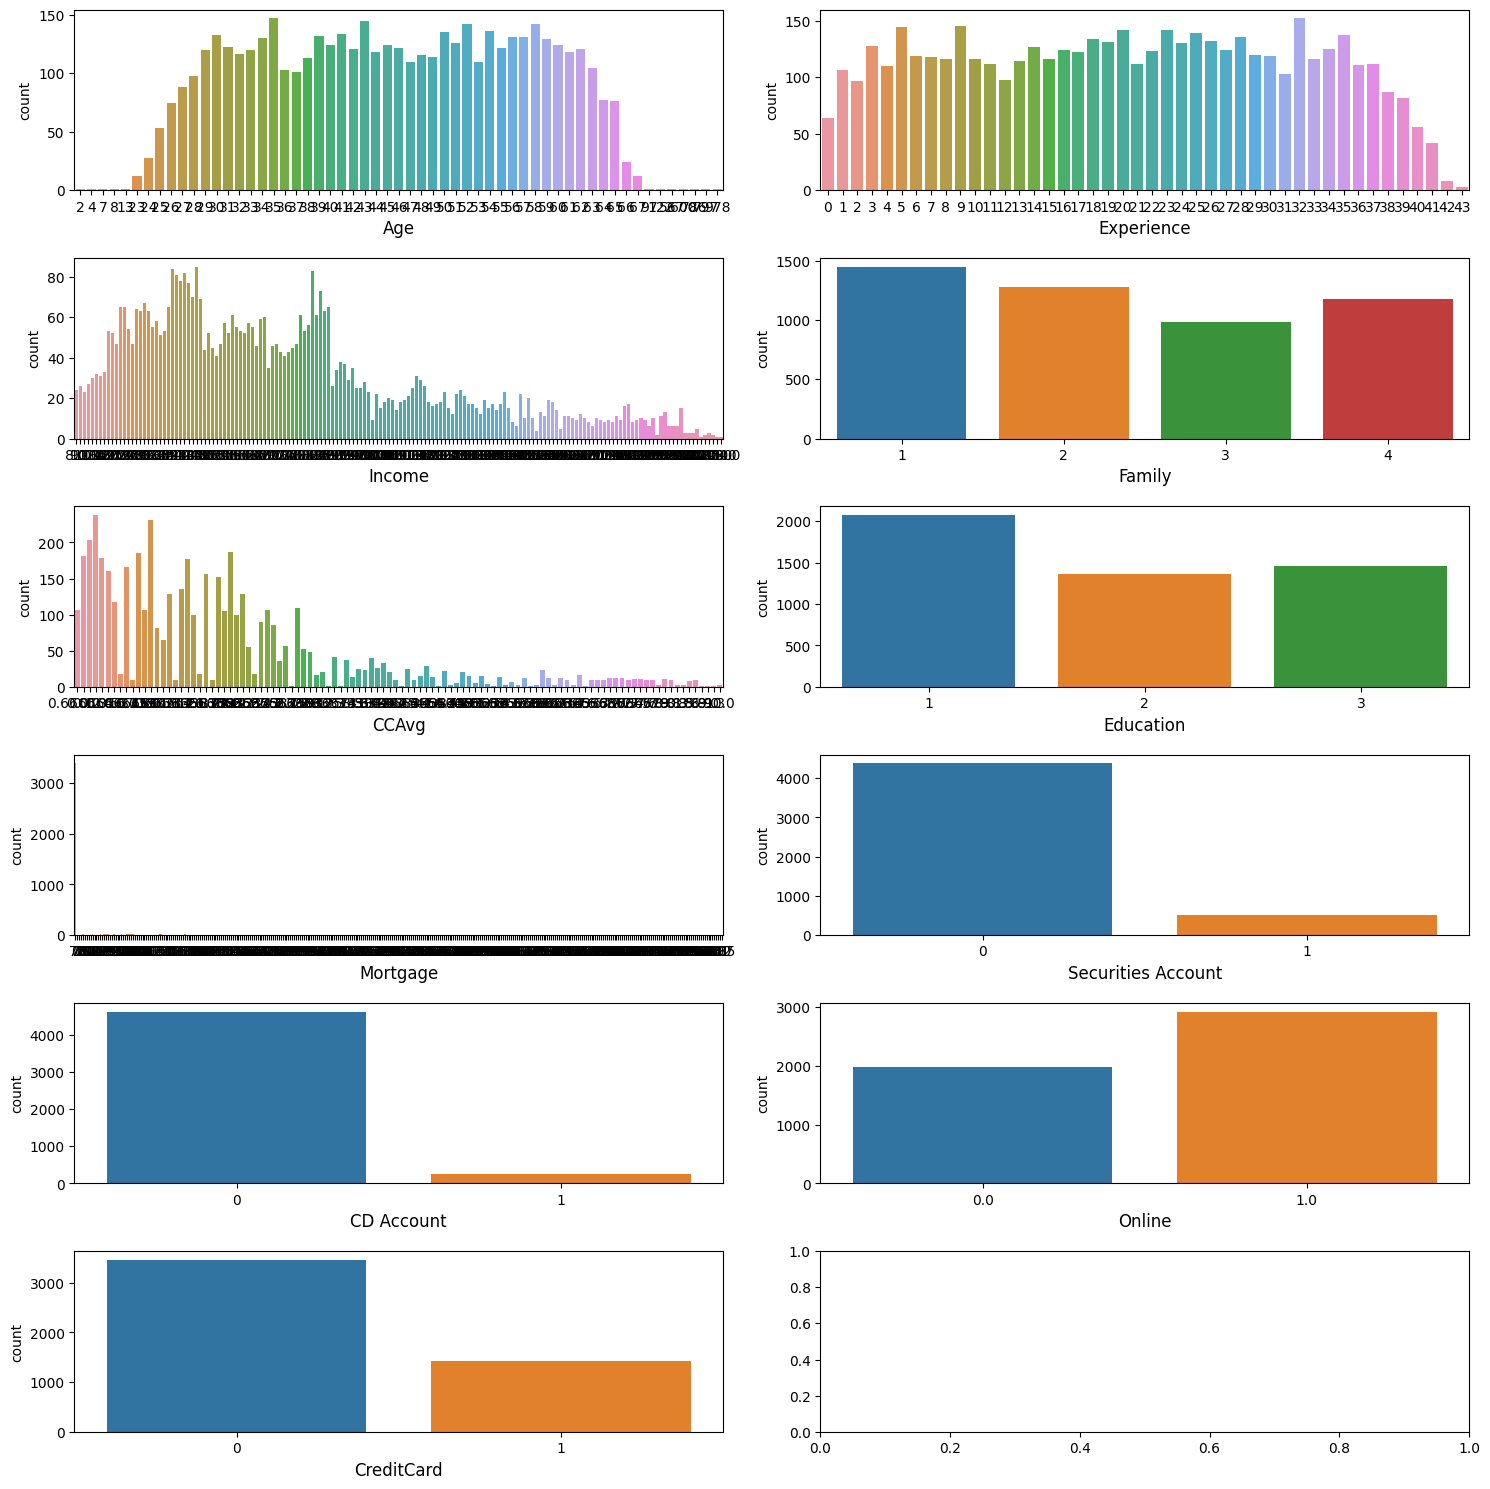

In [28]:
features = ['Age',
            'Experience',
            'Income',
            'Family',
            'CCAvg',
            'Education',
            'Mortgage',
            'Securities Account',
            'CD Account',
            'Online',
            'CreditCard']

target = 'Personal Loan'

fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(15,15), dpi=100)

for i in range(len(features)):
    x = i//2
    y = i%2
    sns.countplot(x=features[i] , data=df , ax=ax[x,y])
    ax[x,y].set_xlabel(features[i], size = 12)
   #

plt.tight_layout()

Drawing the scatterplot between target class and one of the other features.

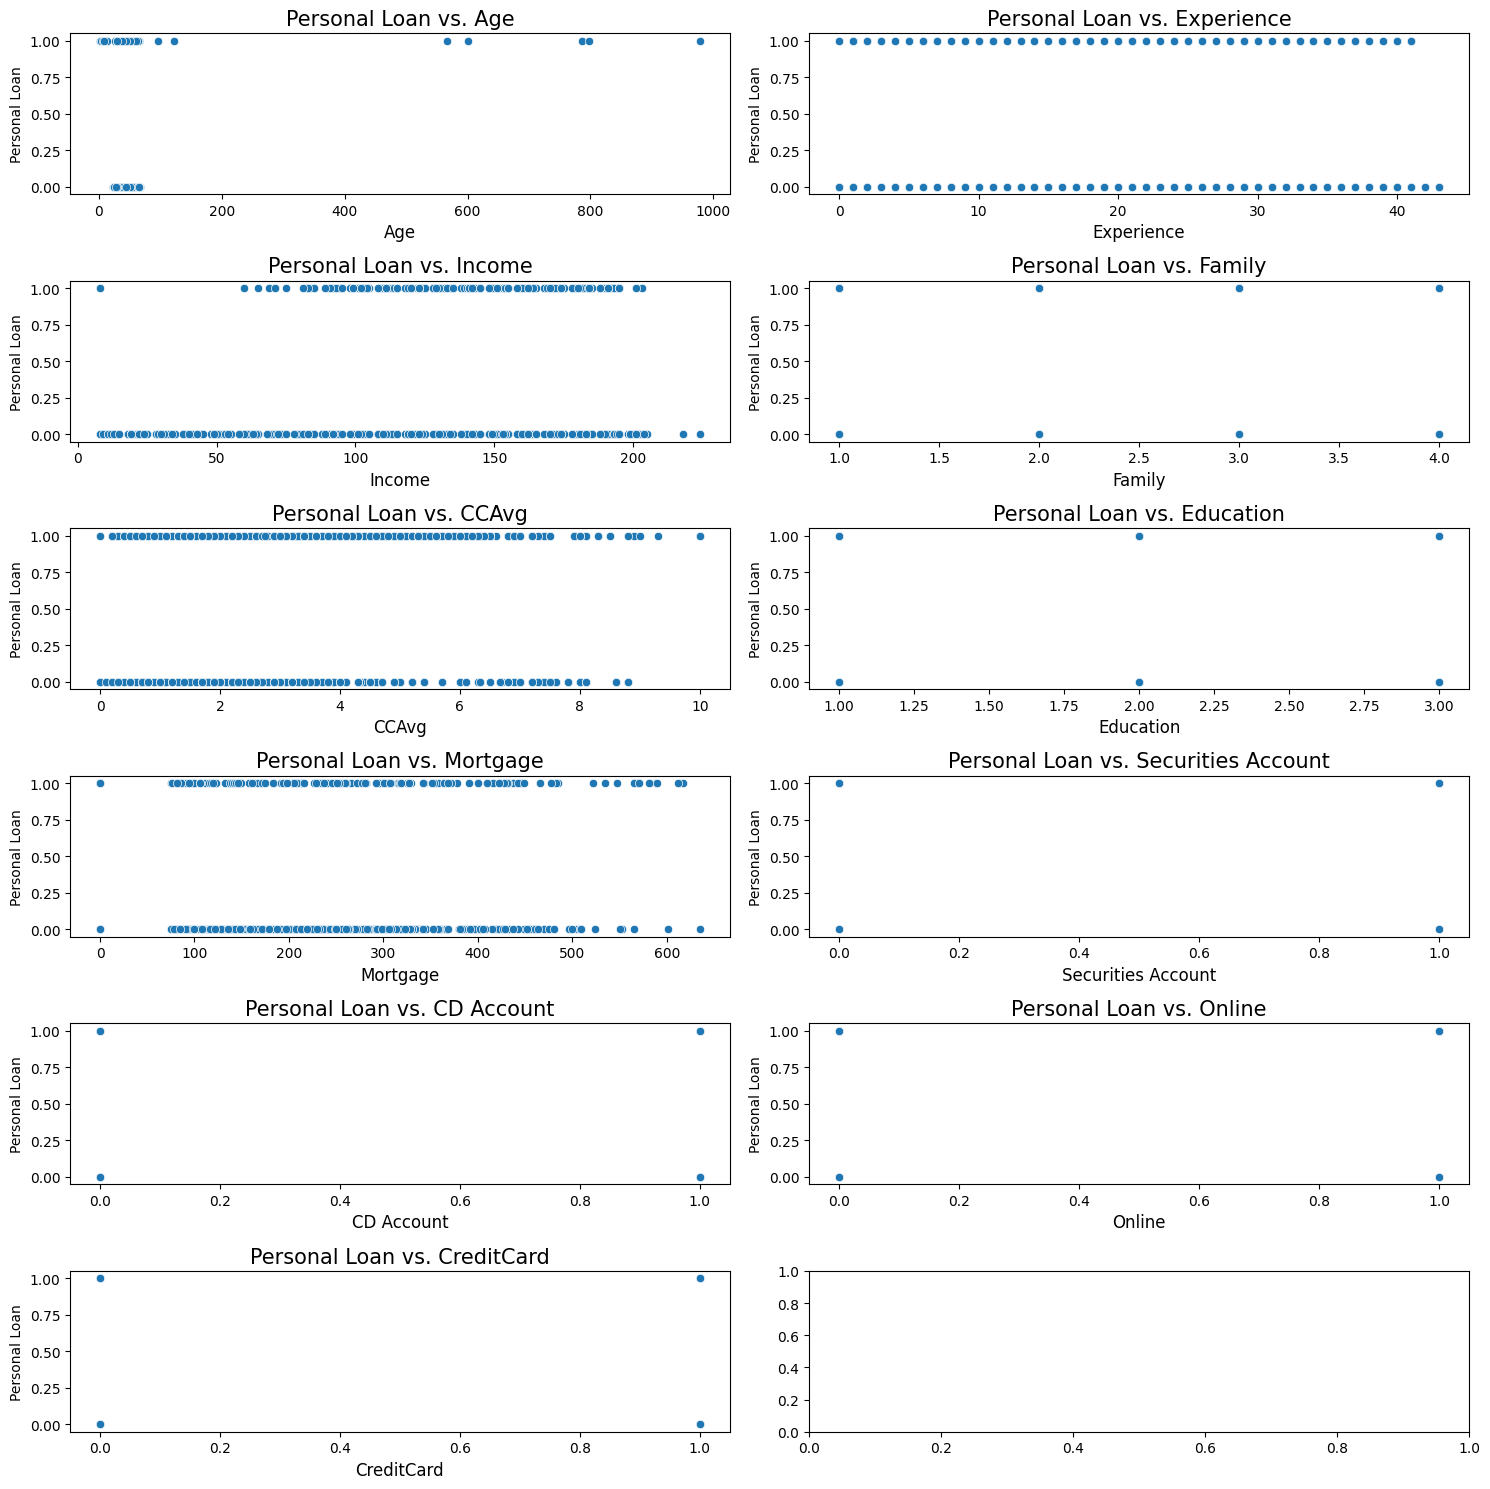

In [29]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(15,15), dpi=100)

for i,var in enumerate(features):
    x = i//2
    y = i%2
    ax[x,y].set_xlabel(features[i], size = 12)
    ax[x,y].set_title('{} vs. {}'.format(target, features[i]), size = 15)
    sns.scatterplot(data=df, x=var , y=df['Personal Loan'], ax=ax[x,y])
plt.tight_layout()

Now, to have a overall view of the outliers lets plot the **Box Plot**

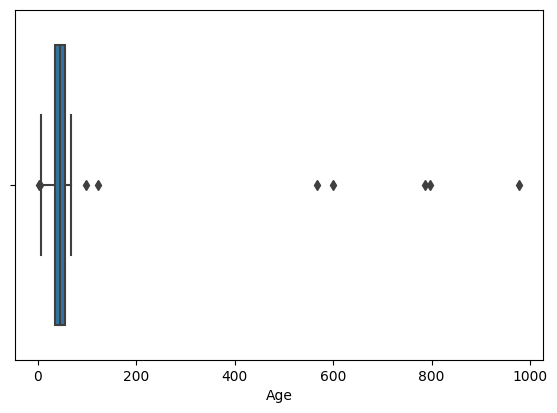

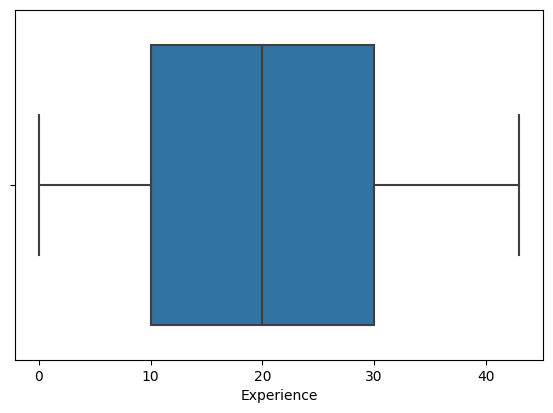

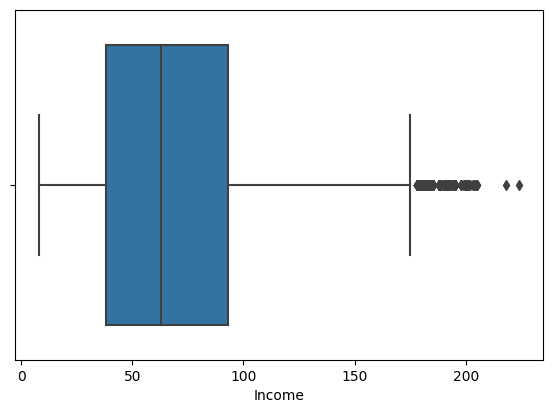

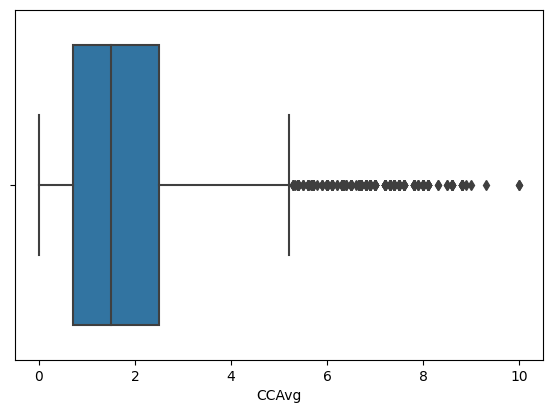

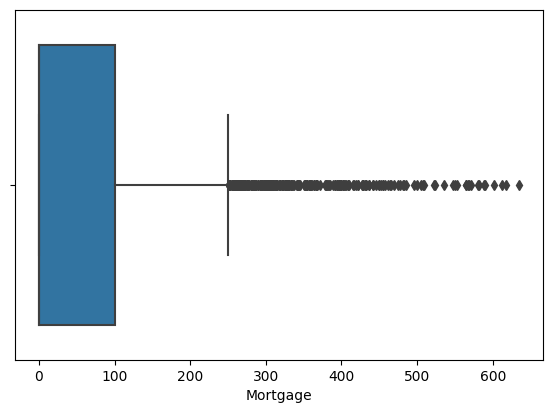

In [30]:
intended_features = ['Age','Experience','Income','CCAvg','Mortgage']


for i in intended_features:
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    sns.boxplot(x=df[i])
    plt.show()

In [31]:
df.shape

(4894, 14)

From the above Box Plot we can clearly see that the age features contains large numbers which can't be true because average age of healthy person is about 75 years. <br> Let consider most upper limit to 80 years.

In [32]:
df['Age'] = df['Age'].apply(lambda x: x if x <= 90 else pd.NA)
df.dropna(subset=['Age'], inplace=True)

In [33]:
df.shape

(4887, 14)

Checking for higher than 9.5 CCAvg which is very less and is acting as outlier in this dataset.

In [34]:
df[df['CCAvg']>9.5]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
2337,2338,43,16,201.0,95054,1,10.0,2,0,1,0,0,0.0,1


In [35]:
 df[(df['Income'] < 20) & (df['Personal Loan'] == 1)]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
2678,2679,63,38,8.0,93023,2,4.3,3,0,1,0,0,1.0,0


Removing above extreme data points:

In [36]:
df.drop(df[df['ID'].isin([2337, 2678])].index)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49.0,91107,4,1.6,1,0,0,1,0,0.0,0
1,2,45,19,34.0,90089,3,1.5,1,0,0,1,0,0.0,0
2,3,39,15,11.0,94720,1,1.0,1,0,0,0,0,0.0,0
3,4,35,9,100.0,94112,1,2.7,2,0,0,0,0,0.0,0
4,5,35,8,45.0,91330,4,1.0,2,0,0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40.0,92697,1,1.9,3,0,0,0,0,1.0,0
4996,4997,30,4,15.0,92037,4,0.4,1,85,0,0,0,1.0,0
4997,4998,63,39,24.0,93023,2,0.3,3,0,0,0,0,0.0,0
4998,4999,65,40,49.0,90034,3,0.5,2,0,0,0,0,1.0,0


Removing data with the income greater than 175k.

In [37]:
df['Income'] = df['Income'].apply(lambda x: x if x < 200 else pd.NA)
df.dropna(subset=['Income'], inplace=True)

At the end of EDA, checking the shape of the dataframe:

In [38]:
df.shape

(4870, 14)

In [39]:
df.drop(['ID'],axis=1,inplace=True)

In [40]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49.0,91107,4,1.6,1,0,0,1,0,0.0,0
1,45,19,34.0,90089,3,1.5,1,0,0,1,0,0.0,0
2,39,15,11.0,94720,1,1.0,1,0,0,0,0,0.0,0
3,35,9,100.0,94112,1,2.7,2,0,0,0,0,0.0,0
4,35,8,45.0,91330,4,1.0,2,0,0,0,0,0.0,1


In [41]:
df['Personal Loan'].value_counts()

0    4504
1     366
Name: Personal Loan, dtype: int64

**Making of the Model**

We have just 2 possible values in the Target class i.e. It is a binary classification. <br> Let us use the **Logistic Regression** and **KNN** algorithms for building out predction model.

But first let us split the dataset into the train and test set.

In [42]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report

In [43]:
#Features
X = df.drop('Personal Loan' , axis=1)

#Target
y = df['Personal Loan']

#Prepare the train data and test data and the size for testing
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state=RANDOM_STATE)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3652, 12), (1218, 12), (3652,), (1218,))

Apply standard scaling to features


In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
# Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [47]:
y_train_resampled.value_counts()

0    3367
1    3367
Name: Personal Loan, dtype: int64

Logistic Regression Model:

In [48]:
logreg = LogisticRegression()
logreg.fit(X_train_resampled,y_train_resampled)
y_pred = logreg.predict(X_test_scaled)
logreg_score = metrics.accuracy_score(y_test,y_pred)
print('accuracy_score :' , logreg_score)

accuracy_score : 0.8981937602627258


In [49]:
print(confusion_matrix(y_test,y_pred))

[[1019  118]
 [   6   75]]


In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1137
           1       0.39      0.93      0.55        81

    accuracy                           0.90      1218
   macro avg       0.69      0.91      0.75      1218
weighted avg       0.95      0.90      0.92      1218



In [51]:
# Save the model to a file using pickle
with open('trained_logreg_model.pkl', 'wb') as file:
    pickle.dump(logreg, file)

KNN Model:

In [52]:
k=50
acc = np.zeros((k))
for i in range(3,k,2):
    Knn = KNeighborsClassifier(n_neighbors=i)
    Knn.fit(X_train_resampled,y_train_resampled)
    y_pred = Knn.predict(X_test_scaled)
    acc[i-1] = metrics.accuracy_score(y_test,y_pred)
Knn_score = np.max(acc)
print('accuracy_score' , Knn_score)

accuracy_score 0.9548440065681445


In [53]:
print(confusion_matrix(y_test,y_pred))

[[1001  136]
 [   3   78]]


In [54]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      0.88      0.94      1137
           1       0.36      0.96      0.53        81

    accuracy                           0.89      1218
   macro avg       0.68      0.92      0.73      1218
weighted avg       0.95      0.89      0.91      1218

